<a href="https://colab.research.google.com/github/EDSONRRs/DIPLOMADO/blob/main/Exposici%C3%B3n_Diplomado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import plotly as pip

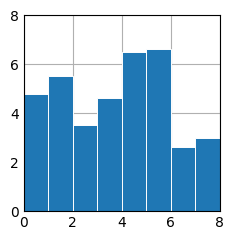

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8),
       ylim=(0, 8))

plt.show()

In [ ]:
Act =pd.read_csv('/content/credits.csv')
Act

,person_id,id,name,character,role
0,60017,tm155702,Judy Garland,Dorothy Gale,ACTOR
1,53496,tm155702,Ray Bolger,Hunk / Scarecrow,ACTOR
2,79549,tm155702,Jack Haley,Hickory / Tin Man,ACTOR
3,79548,tm155702,Bert Lahr,Zeke / Cowardly Lion,ACTOR
4,60995,tm155702,Margaret Hamilton,Elmira Gulch / Wicked Witch of the West,ACTOR
...,...,...,...,...,...
66388,1224011,tm1067128,Stella Lauri,Marta,ACTOR
66389,2305342,tm1067128,Fabiola Sánchez,Claudia,ACTOR
66390,1245864,tm1067128,Ash Olivera,Nora,ACTOR
66391,2305203,tm1067128,Mariel Garcia Spooner,NaN,DIRECTOR


In [ ]:
peli=pd.read_csv('/content/titles.csv')
peli.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8


In [ ]:
Reper=peli.merge(Act,on='id',how='left')#juntar ambas bases de datos por medio de la id
Reper.head(4)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,60017.0,Judy Garland,Dorothy Gale,ACTOR
1,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,53496.0,Ray Bolger,Hunk / Scarecrow,ACTOR
2,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,79549.0,Jack Haley,Hickory / Tin Man,ACTOR
3,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,79548.0,Bert Lahr,Zeke / Cowardly Lion,ACTOR


<Axes: >

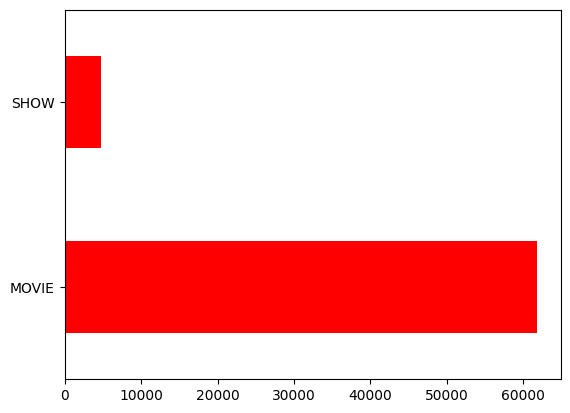

In [ ]:
Reper['type'].value_counts().plot(kind='barh',color='red')#Grafica la repeticioon de valores unicos de type

<Axes: >

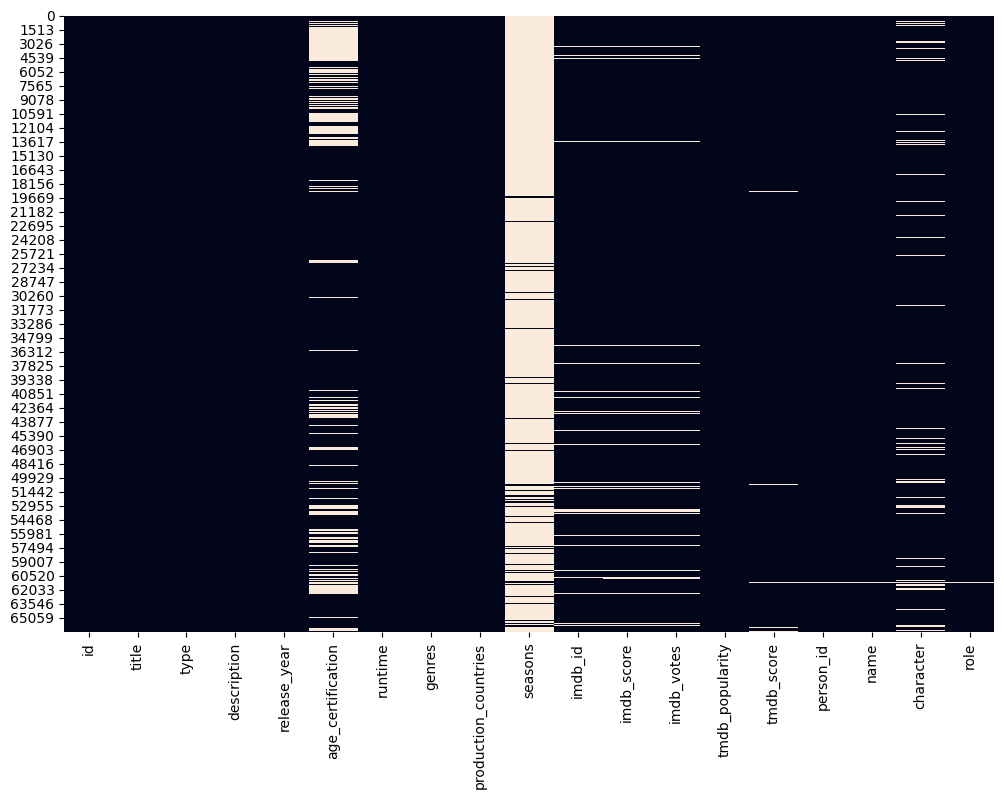

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(Reper.isnull(),cbar=False)

In [ ]:
print('Cantidad de ciudades que producen las series y peliculas:',Reper['production_countries'].unique().shape)

Cantidad de ciudades que producen las series y peliculas: (268,)


In [ ]:
Reper ['production_countries']=Reper['production_countries'].str.strip('[]')


In [ ]:
Reper['production_countries']=Reper['production_countries'].replace(r'^s*$', float('NaN'), regex = True)
Reper.dropna(subset=['production_countries'],inplace=True)#line 17 y 18: Reemplazar y quitar los valores nulos

<Axes: ylabel='Country Abbreviation'>

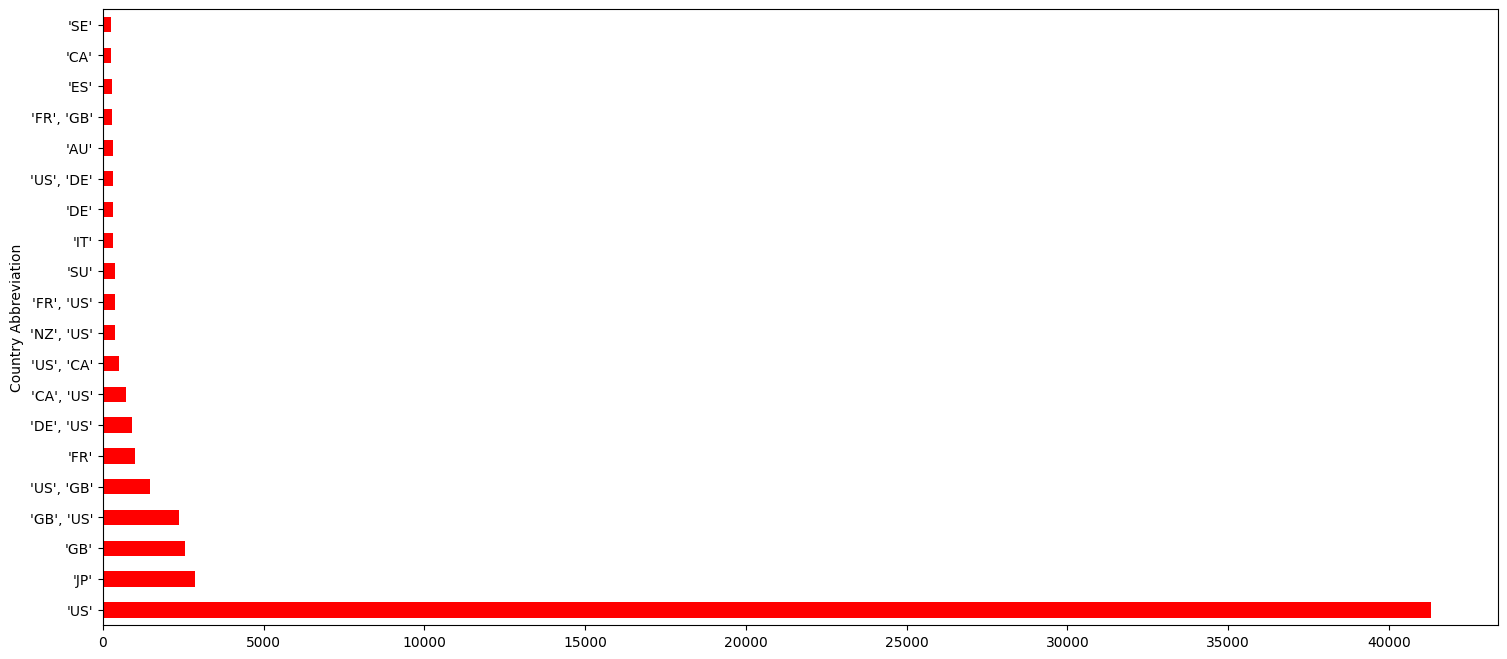

In [ ]:
plt.subplots(figsize=(18,8))
plt.xlabel('Total count')
plt.ylabel('Country Abbreviation')

Reper['production_countries'].value_counts().sort_values(ascending=False)[:20].plot(kind='barh',color='red')

In [ ]:
type_data=Reper.groupby('type')['release_year'].value_counts().sort_values().unstack().fillna(0).T.reset_index()
type_data.rename(columns={'type':'index','release_year':'Year','MOVIE':'Movie','SHOW':'Tv Show'},inplace=True)

In [ ]:
type_data.rename(index={'type':'index'},inplace=True)


In [ ]:
fig=px.scatter(type_data,x='Year',y=['Movie','Tv Show'],width=700,height=600)
fig.show()

<Axes: ylabel='age_certification,type'>

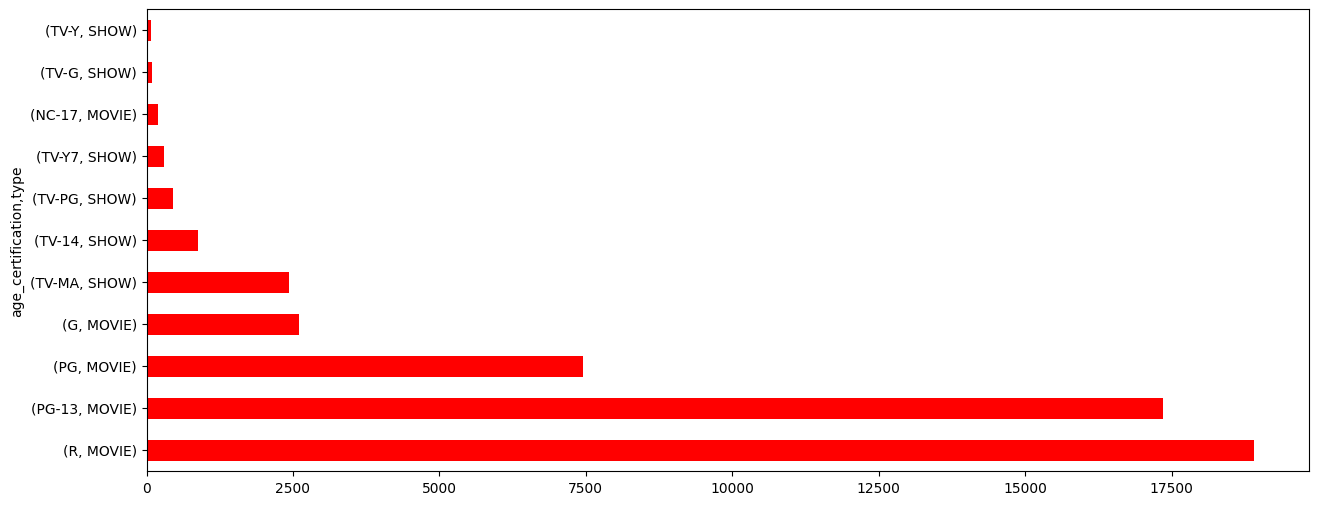

In [ ]:
plt.subplots(figsize=(15,6))
plt.xlabel('counts')
Reper.groupby('age_certification')['type'].value_counts().sort_values(ascending=False).plot(kind='barh',color='red') #Representa la cuenta de ocurrencia de cada elemento del eje y

In [ ]:
MOVIE=Reper[['imdb_votes','type','title']].sort_values('imdb_votes',ascending=False).drop_duplicates().reset_index(drop=True)[:20]
MOVIE

,imdb_votes,type,title
0,2555504.0,MOVIE,The Dark Knight
1,2548100.0,MOVIE,The Shawshank Redemption
2,2268288.0,MOVIE,Inception
3,1983794.0,SHOW,Game of Thrones
4,1857949.0,MOVIE,The Matrix
5,1798012.0,MOVIE,The Lord of the Rings: The Fellowship of the Ring
6,1776725.0,MOVIE,The Lord of the Rings: The Return of the King
7,1604677.0,MOVIE,The Lord of the Rings: The Two Towers
8,1586065.0,MOVIE,Se7en
9,1426616.0,MOVIE,Batman Begins


In [ ]:
MOVIE=MOVIE[MOVIE['type'] != 'SHOW']
MOVIE#Series con mayor numero de votos

,imdb_votes,type,title
0,2555504.0,MOVIE,The Dark Knight
1,2548100.0,MOVIE,The Shawshank Redemption
2,2268288.0,MOVIE,Inception
4,1857949.0,MOVIE,The Matrix
5,1798012.0,MOVIE,The Lord of the Rings: The Fellowship of the Ring
6,1776725.0,MOVIE,The Lord of the Rings: The Return of the King
7,1604677.0,MOVIE,The Lord of the Rings: The Two Towers
8,1586065.0,MOVIE,Se7en
9,1426616.0,MOVIE,Batman Begins
10,1283897.0,MOVIE,The Departed


In [ ]:
print('La mejor pelicula es:',MOVIE.imdb_votes.max(),'La peor pelicula es :',MOVIE.imdb_votes.min())


La mejor pelicula es: 2555504.0 La peor pelicula es : 989119.0


In [ ]:
tv=Reper[Reper['type']=='SHOW']
tv[['imdb_votes','title']].sort_values('imdb_votes',ascending=False).drop_duplicates().reset_index(drop=True)[:20]

,imdb_votes,title
0,1983794.0,Game of Thrones
1,950362.0,Friends
2,782154.0,The Big Bang Theory
3,693955.0,Chernobyl
4,546443.0,True Detective
5,474807.0,Westworld
6,473951.0,Rick and Morty
7,440706.0,Band of Brothers
8,372367.0,The Sopranos
9,359621.0,South Park


In [ ]:
Reper[['imdb_score','title','type']].sort_values('imdb_score',ascending=False).drop_duplicates().reset_index(drop=True)[:20]#LAs 20 mejores de todo

,imdb_score,title,type
0,9.4,Chernobyl,SHOW
1,9.4,Band of Brothers,SHOW
2,9.3,The Shawshank Redemption,MOVIE
3,9.3,Lamput,SHOW
4,9.3,The Wire,SHOW
5,9.2,Game of Thrones,SHOW
6,9.2,Emergency Contact,MOVIE
7,9.2,The Sopranos,SHOW
8,9.2,Rick and Morty,SHOW
9,9.2,Eyes on the Prize,SHOW


In [ ]:
Reper[['tmdb_popularity','title','type','tmdb_score']].sort_values(by='tmdb_popularity',ascending=False).drop_duplicates().reset_index(drop=True)[:20]

,tmdb_popularity,title,type,tmdb_score
0,4447.894,The Batman,MOVIE,7.8
1,757.816,The Baby,SHOW,8.8
2,641.541,The Matrix Resurrections,MOVIE,6.7
3,565.886,Kimi,MOVIE,6.2
4,559.090,The King's Man,MOVIE,6.9
5,527.634,Superman & Lois,SHOW,8.1
6,492.101,Game of Thrones,SHOW,8.4
7,445.399,Euphoria,SHOW,8.4
8,398.516,Free Guy,MOVIE,7.7
9,386.008,Death on the Nile,MOVIE,6.5


In [ ]:
tv['seasons']=tv['seasons'].dropna().astype(int)

<ipython-input-57-09b34e8a2b59>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
tv[['seasons','title']].sort_values('seasons',ascending=False).drop_duplicates().dropna().reset_index(drop=True)[:20]#EL que tiene el mayor numero de temporadas

,seasons,title
0,52,Sesame Street
1,31,Top Gear
2,28,Real Sports with Bryant Gumbel
3,26,The Bachelor
4,25,South Park
5,20,Real Time with Bill Maher
6,18,The Bachelorette
7,17,Hard Knocks
8,16,Tom and Jerry
9,15,ER
